<a href="https://colab.research.google.com/github/YinhaoHe/Python-AI-teaching/blob/master/Clothes_Classificaiton_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#Download the dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

**Exploring the Data** <br>
What is the in the dataset? <br>
What do these values means?

In [4]:
test_images.shape

(10000, 28, 28)

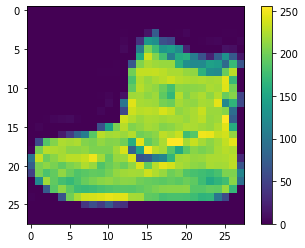

In [12]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [ ]:
train_images2 = np.copy(train_images)
for i in range(len(train_images)): #0 to 59,999
  img = train_images[i] # <- 28x28 image
  for j in range(len(img)): #0 to 28
    img_row = train_images[i][j] # <- 28 item list
    for l in range(len(img_row)): # 0 to 28
      train_images2[i][j][l] = float(train_images[i][j][l])/float(255.0)
      #print(train_images2[i][j][l])



**Data Processing** <br>
Scale all of the values to be in the range 0 to 1

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**Build the Model**<br>
use input_shape=(28,28), instead of input_dim for the first hidden layer



In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Compile the Model** <br>
optimizer= 'adam'<br>
loss='sparse_categorical_crossentropy'

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the Model**

In [18]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4976 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3380 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.8911


**Evaluating Accuracy** <br>
On the Test set

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.3524 - accuracy: 0.8714
Test accuracy: 0.871399998664856


**Making Predictions**

In [25]:
def predict_img(images, labels,num):
  img = images[num]
  plt.imshow(img)
  
  img = (np.expand_dims(img,0))
  prediction = model.predict(img)
  
  pred_label = np.argmax(prediction)
  correct_label = labels[num]
  print("Prediction: " + class_names.get(pred_label))
  print("Correct label: " + class_names.get(correct_label))

Prediction: T-shirt/top
Correct label: Shirt


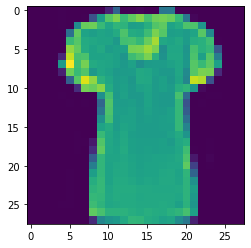

In [26]:
predict_img(train_images,train_labels,2012)